In [136]:
import pandas as pd
import numpy as np
import geopandas as gpd
from shapely.geometry import shape
import fiona
from shapely.ops import unary_union
import networkx as nx
import itertools
import osmnx as ox
import math
import momepy
import matplotlib.pyplot as plt
from shapely.geometry import Point
import io

# Use LTS V 2.20 to validate the SF Network Connectivity. The below is the LTS criteria

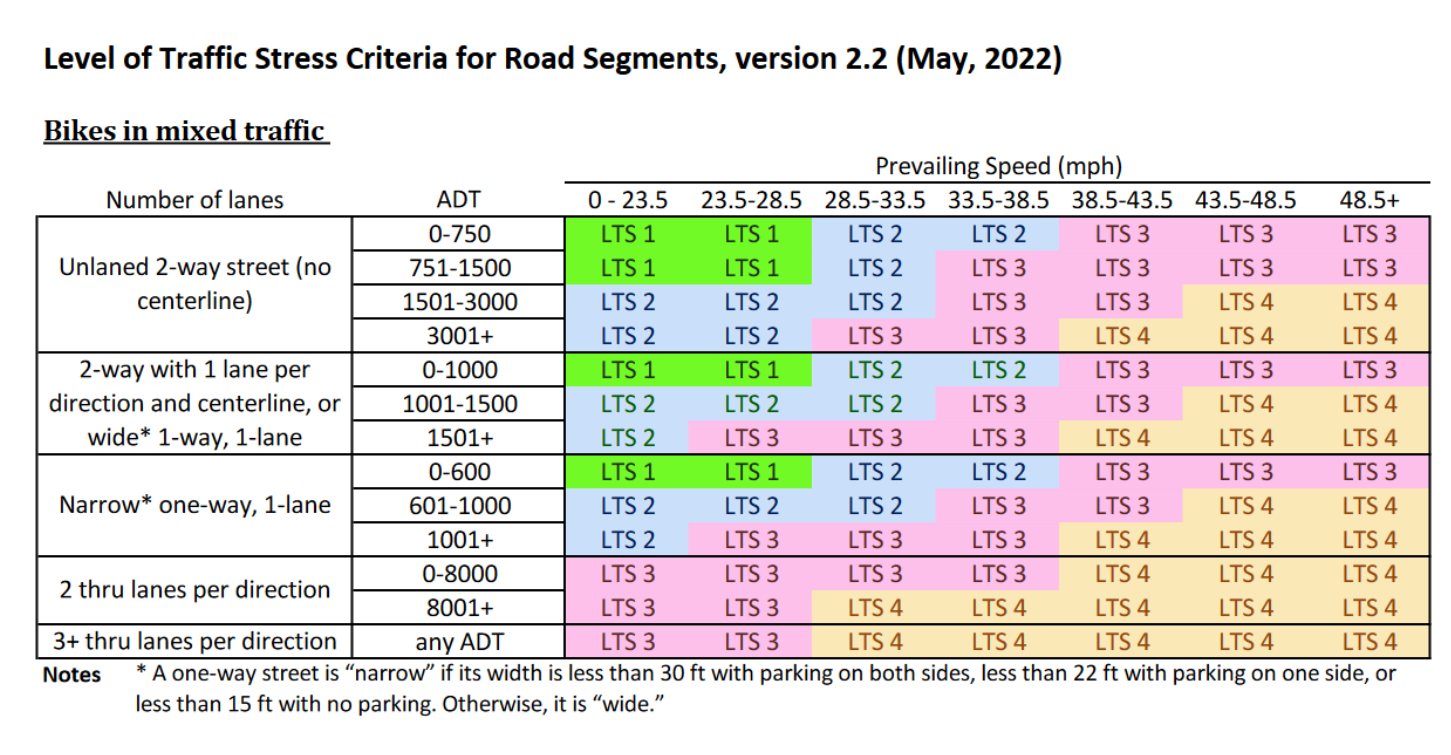

In [137]:
# Lets define LTS criteris for mixed traffic
# true=1, false=0, none=99
def LTS_mixed_traffic(AADT, Number_of_lanes, centerline,direction, speed):
    
    if ((Number_of_lanes==1) and (centerline==0) and (direction==2) and (AADT<751) and (speed<=28.5)):
        return 1
    elif ((Number_of_lanes==1) and (centerline==0) and (direction==2) and (AADT<751) and (speed>28.5) and (speed<=38.5)):
        return 2 
    elif ((Number_of_lanes==1) and (centerline==0) and (direction==2) and (AADT<751) and (speed>38.5)):
        return 3 

    elif ((Number_of_lanes==1) and (centerline==0) and (direction==2) and (AADT>750) and (AADT<1501) and (speed<=28.5)):
        return 1 
    elif ((Number_of_lanes==1) and (centerline==0) and (direction==2) and (AADT>750) and (AADT<1501) and (speed>28.5) and (speed<=33.5)):
        return 2 
    elif ((Number_of_lanes==1) and (centerline==0) and (direction==2) and (AADT>750) and (AADT<1501) and (speed>33.5)):
        return 3

    elif ((Number_of_lanes==1) and (centerline==0) and (direction==2) and (AADT>1500) and (AADT<3001) and (speed<=33.5)):
        return 2 
    elif ((Number_of_lanes==1) and (centerline==0) and (direction==2) and (AADT>1500) and (AADT<3001) and (speed>33.5) and (speed<=43.5)):
        return 3
    elif ((Number_of_lanes==1) and (centerline==0) and (direction==2) and (AADT>1500) and (AADT<3001) and (speed>43.5)):
        return 4

    elif ((Number_of_lanes==1) and (centerline==0) and (direction==2) and (AADT>3000) and (speed<=28.5)):
        return 2
    elif ((Number_of_lanes==1) and (centerline==0) and (direction==2) and (AADT>3000) and (speed>28.5) and (speed<=38.5)):
        return 3 
    elif ((Number_of_lanes==1) and (centerline==0) and (direction==2) and (AADT>3000) and (speed>38.5)):
        return 4 


    elif ((Number_of_lanes==1) and (centerline==1) and (direction==2) and (AADT<1001) and (speed<=28.5)):
        return 1
    elif ((Number_of_lanes==1) and (centerline==1) and (direction==2) and  (AADT<1001) and (speed>28.5) and (speed<=38.5)):
        return 2
    elif ((Number_of_lanes==1) and (centerline==1) and (direction==2) and (AADT<1001) and (speed>38.5)):
        return 3

    elif ((Number_of_lanes==1) and (centerline==1) and (direction==2) and (AADT>1000) and (AADT<=1500) and (speed<=33.5)):
        return 2
    elif ((Number_of_lanes==1) and (centerline==1) and (direction==2) and (AADT>1000) and (AADT<=1500) and (speed> 33.5) and (speed<=43.5)):
        return 3
    elif ((Number_of_lanes==1) and (centerline==1) and (direction==2) and (AADT>1000) and (AADT<=1500) and (speed> 43.5 )):
        return 4

    elif ((Number_of_lanes==1) and (centerline==1) and (direction==2) and (AADT>1500)  and (speed<=23.5)):
        return 2  
    elif ((Number_of_lanes==1) and (centerline==1) and (direction==2) and (AADT>1500)  and (speed> 23.5) and (speed<=38.5)):
        return 3  
    elif ((Number_of_lanes==1) and (centerline==1) and (direction==2) and (AADT>1500)  and (speed>38.5)):
        return 4

    elif ((Number_of_lanes==1) and (centerline==0) and (direction==1) and (AADT<601)  and (speed<=28.5)):
        return 1  
    elif ((Number_of_lanes==1) and (centerline==0) and (direction==1) and (AADT<600)  and (speed>28.5) and (speed<=38.5)):
        return 2         
    elif ((Number_of_lanes==1) and (centerline==0) and (direction==1) and (AADT<600)  and (speed>38.5)):
        return 3

    elif ((Number_of_lanes==1) and (centerline==0) and (direction==1) and (AADT>600)  and (AADT <=1000) and (speed<=33.5)):
        return 2  
    elif ((Number_of_lanes==1) and (centerline==0) and (direction==1) and (AADT>600)  and (AADT <=1000) and (speed> 33.5) and (speed<=43.5)):
        return 3         
    elif ((Number_of_lanes==1) and (centerline==0) and (direction==1) and (AADT>600)  and (AADT <=1000) and (speed> 43.5)):
        return 4 

    elif ((Number_of_lanes==1) and (centerline==0) and (direction==1) and (AADT>1000) and (speed<=23.5)):
        return 2          
    elif ((Number_of_lanes==1) and (centerline==0) and (direction==1) and (AADT>1000) and speed>23.5 and (speed<= 38.5)):
        return 3 
    elif ((Number_of_lanes==1) and (centerline==0) and (direction==1) and (AADT>1000)  and (speed> 38.5)):
        return 4

    elif ((Number_of_lanes==2)  and (centerline==1)  and (direction==2)  and (AADT<=8000) and (speed<=38.5)):
        return 3
    elif ((Number_of_lanes==2)  and (centerline==1)  and (direction==2)  and (AADT<=8000) and (speed>38.5)):
        return 4
    elif ((Number_of_lanes==2) and (centerline==1) and (direction==2)  and (AADT>8000) and (speed<=28.5)):
        return 3 
    elif ((Number_of_lanes==2) and (centerline==1) and (direction==2)  and (AADT>8000) and (speed>28.5)):
        return 4 
    

    elif ((Number_of_lanes >=3) and (centerline==1) and (direction==2) and (AADT<=50000) and (speed<=28.5)):
        return 3
    elif ((Number_of_lanes >=3) and (centerline==1) and (direction==2) and (AADT<=50000) and (speed>28.5)):
        return 4 
    else:
        return 1
    

In [138]:
# Test the function with dummy variables, make a dummpy pandas dataframe
data = {'Number_of_lanes': [1, 2, 3, 4, 5],
        'centerline': [0, 1, 1, 1, 1],
        'direction': [1, 1, 2, 2, 2],
        'AADT':[400, 800, 1200, 1600, 1800],
        'speed':[15, 20, 25, 30, 45]
        }

df = pd.DataFrame(data)
df

,Number_of_lanes,centerline,direction,AADT,speed
0,1,0,1,400,15
1,2,1,1,800,20
2,3,1,2,1200,25
3,4,1,2,1600,30
4,5,1,2,1800,45


In [139]:
df.columns

Index(['Number_of_lanes', 'centerline', 'direction', 'AADT', 'speed'], dtype='object')

In [140]:
# test the algorithm
df['LTS']=df.apply(lambda row: LTS_mixed_traffic(row['AADT'], row['Number_of_lanes'], row['centerline'], row['direction'], row['speed']),axis=1)
df

,Number_of_lanes,centerline,direction,AADT,speed,LTS
0,1,0,1,400,15,1
1,2,1,1,800,20,1
2,3,1,2,1200,25,3
3,4,1,2,1600,30,4
4,5,1,2,1800,45,4


# Now lets define bikelane with parking LTS


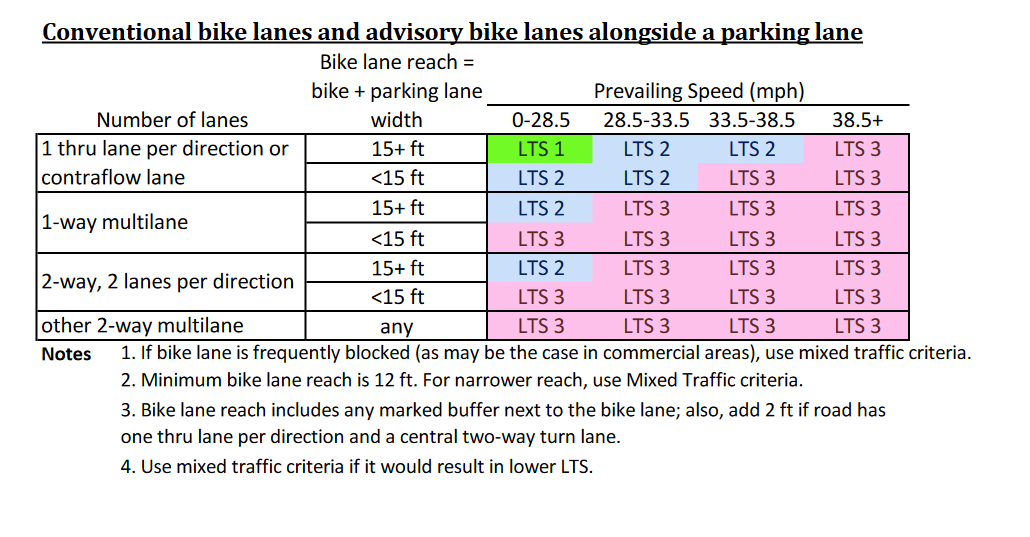

In [141]:
# define the function to calculate the bike lane with parking LTS

def bike_lane_with_parking_LTS(Number_of_lanes, direction, bike_lane_reach_width, speed ):
    if ((Number_of_lanes==1) and (direction==2) and (bike_lane_reach_width>=15) and (speed<=28.5)):
        return 1
    elif ((Number_of_lanes==1) and (direction==2) and (bike_lane_reach_width>=15) and (speed>28.5) and (speed<=38.5)):
        return 2
    elif ((Number_of_lanes==1) and (direction==2) and (bike_lane_reach_width>=15) and (speed>38.5)):
        return 3
    elif ((Number_of_lanes==1) and (direction==2) and (bike_lane_reach_width<15) and (speed<=33.5)):
        return 2   
    elif ((Number_of_lanes==1) and (direction==2) and (bike_lane_reach_width<15) and (speed>33.5)):
        return 3 
    
    elif ((Number_of_lanes>1) and (direction==1) and (bike_lane_reach_width>=15) and (speed<=28.5)):
        return 2
    elif ((Number_of_lanes>1) and (direction==1) and (bike_lane_reach_width>=15) and (speed>28.5)):
        return 3
    elif ((Number_of_lanes>1) and (direction==1) and (bike_lane_reach_width<15) and (speed<90)):
        return 3
    
    elif ((Number_of_lanes==2) and (direction==2) and (bike_lane_reach_width>=15) and (speed<=28.5)):
        return 2
    elif ((Number_of_lanes==2) and (direction==2) and (bike_lane_reach_width>=15) and (speed>28.5)):
        return 3
    elif ((Number_of_lanes==2) and (direction==2) and (bike_lane_reach_width<15) and (speed<90)):
        return 3
    elif ((Number_of_lanes>1) and (direction==2) and (bike_lane_reach_width>0) and (speed>=0)):
        return 3
    else:
        return 1
    

In [142]:
# Test the function with dummy variables, make a dummpy pandas dataframe
data1 = {'Number_of_lanes': [1, 2, 3, 4, 5],
        'direction': [1, 1, 2, 2, 2],
        'bike_lane_reach_width':[8, 14, 25, 30, 12],
        'speed':[15, 20, 25, 30, 45]
        }

df1 = pd.DataFrame(data1)
df1

,Number_of_lanes,direction,bike_lane_reach_width,speed
0,1,1,8,15
1,2,1,14,20
2,3,2,25,25
3,4,2,30,30
4,5,2,12,45


In [143]:
# test the algorithm
df1['LTS']=df1.apply(lambda row: bike_lane_with_parking_LTS(row['Number_of_lanes'], row['direction'],row['bike_lane_reach_width'],row['speed']),axis=1)
df1

,Number_of_lanes,direction,bike_lane_reach_width,speed,LTS
0,1,1,8,15,1
1,2,1,14,20,3
2,3,2,25,25,3
3,4,2,30,30,3
4,5,2,12,45,3


# Now lets define bikelane without parking LTS

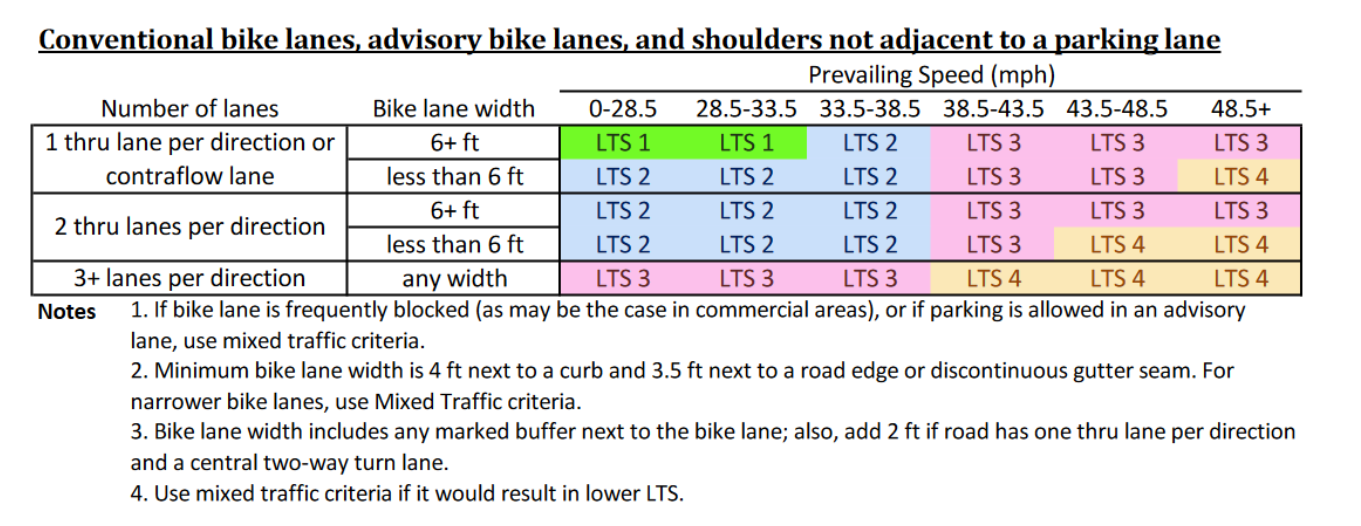

In [144]:
def bike_lane_without_parking_LTS(Number_of_lanes, direction, bike_lane_width, speed ):
    if ((Number_of_lanes==1) and (direction==2) and (bike_lane_width>=6) and (speed<=33.5)):
        return 1
    elif ((Number_of_lanes==1) and (direction==2) and (bike_lane_width>=6) and (speed>33.5) and (speed<=38.5)):
        return 2 
    elif ((Number_of_lanes==1) and (direction==2) and (bike_lane_width>=6) and (speed>38.5)):
        return 3
    elif ((Number_of_lanes==1) and (direction==2) and (bike_lane_width<6) and (speed<=38.5)):
        return 2 
    elif ((Number_of_lanes==1) and (direction==2) and (bike_lane_width<6) and (speed>38.5) and (speed<=48.5)):
        return 3 
    elif ((Number_of_lanes==1) and (direction==2) and (bike_lane_width<6) and (speed>48.5)):
        return 4
    
    elif ((Number_of_lanes==2) and (direction==2) and (bike_lane_width>=6) and (speed<=38.5)):
        return 2
    elif ((Number_of_lanes==2) and (direction==2) and (bike_lane_width>=6) and (speed>38.5)):
        return 3
    elif ((Number_of_lanes==2) and (direction==2) and (bike_lane_width<6) and (speed<=38.5)):
        return 2
    elif ((Number_of_lanes==2) and (direction==2) and (bike_lane_width<6) and (speed>38.5) and (speed<=43.5)):
        return 3
    elif ((Number_of_lanes==2) and (direction==2) and (bike_lane_width<6) and (speed>43.5)):
        return 4
    
    elif ((Number_of_lanes==3) and (direction==2) and (bike_lane_width>0) and (speed<=38.5)):
        return 3
    elif ((Number_of_lanes==3) and (direction==2) and (bike_lane_width>0) and (speed>38.5)):
        return 4
    else:
        return 1

In [145]:
# Test the function with dummy variables, make a dummpy pandas dataframe
data2 = {'Number_of_lanes': [1, 2, 3, 8, 5],
        'direction': [2, 1, 2, 2, 2],
        'bike_lane_width':[8, 6, 8, 10, 12],
        'speed':[40, 20, 25, 30, 45]
        }

df2 = pd.DataFrame(data2)
df2

,Number_of_lanes,direction,bike_lane_width,speed
0,1,2,8,40
1,2,1,6,20
2,3,2,8,25
3,8,2,10,30
4,5,2,12,45


In [146]:
# test the algorithm
df2['LTS']=df2.apply(lambda row: bike_lane_without_parking_LTS(row['Number_of_lanes'], row['direction'],row['bike_lane_width'],row['speed']),axis=1)
df2

,Number_of_lanes,direction,bike_lane_width,speed,LTS
0,1,2,8,40,3
1,2,1,6,20,1
2,3,2,8,25,3
3,8,2,10,30,1
4,5,2,12,45,1


# Calculate LTS for SF auto and bike network

In [147]:
# Now test ffor real network, read motor network for San Francisco
mn=gpd.read_file('H:/mmmiah/Desktop/Bicycle Connectivity Project/SF Validation_data/LTS_data/mixed_traffic_network.json', driver="GeoJSON")
#mn=mn0.to_crs(epsg=7131)
#mn['length_in_mile']=mn['geometry'].length*0.000621371
mn.head()

,unique_id,ending_ele,cnn,street_x,st_type,from_st,to_st,speedlimit,AADT,Shape_Leng,...,TF_PARK,FT_SEG_STR,speed,forward_lane_num,backward_lane_num,direction,centerline,length,slope,geometry
0,16,9,129000.0,02ND,ST,MARKET ST,STEVENSON ST,0.0,16525.99692,0.000722,...,0,2.0,25.0,1.0,1.0,2,1,70.508916,0.000000,"LINESTRING (-122.40138 37.78927, -122.40081 37..."
1,19,59,121000.0,02ND,AVE,CORNWALL ST,CLEMENT ST,0.0,0.00000,0.001871,...,0,1.0,15.0,1.0,1.0,2,0,207.521292,0.481878,"LINESTRING (-122.46027 37.78501, -122.46014 37..."
2,20,60,122000.0,02ND,AVE,CLEMENT ST,GEARY BLVD,0.0,0.00000,0.001935,...,0,1.0,15.0,1.0,1.0,2,0,214.571476,0.466045,"LINESTRING (-122.46014 37.78314, -122.46000 37..."
3,22,97,128000.0,02ND,AVE,HUGO ST,IRVING ST,0.0,39.99996,0.000941,...,0,1.0,15.0,1.0,1.0,2,0,104.356250,5.749536,"LINESTRING (-122.45888 37.76530, -122.45882 37..."
4,28,63,124000.0,02ND,AVE,ANZA ST,BALBOA ST,0.0,784.99953,0.001855,...,0,1.0,15.0,1.0,1.0,2,0,205.686415,0.486177,"LINESTRING (-122.45986 37.77928, -122.45972 37..."


In [148]:
list(mn.columns)

['unique_id',
 'ending_ele',
 'cnn',
 'street_x',
 'st_type',
 'from_st',
 'to_st',
 'speedlimit',
 'AADT',
 'Shape_Leng',
 'street_y',
 'ROAD_ID',
 'OSMID',
 'FUNCTIONAL',
 'PATH_ID',
 'ONE_WAY',
 'INTERSECTI',
 'INTERSE_01',
 'WIDTH',
 'FT_BIKE_IN',
 'TF_BIKE_IN',
 'FT_LANES',
 'TF_LANES',
 'FT_PARK',
 'TF_PARK',
 'FT_SEG_STR',
 'speed',
 'forward_lane_num',
 'backward_lane_num',
 'direction',
 'centerline',
 'length',
 'slope',
 'geometry']

In [149]:
# Before claculating the LTS and Connectivity remove the highways
mn1= mn[~mn['street_x'].str.contains("HWY").fillna(False)]
mn2= mn1[~mn1['street_x'].str.contains("I-").fillna(False)]
mn2.shape

(16347, 34)

In [150]:
mn2['FUNCTIONAL'].unique()

array(['tertiary', 'residential', '0', 'secondary_link', 'path',
       'unclassified', 'secondary', 'primary', 'trunk_link',
       'primary_link', 'tertiary_link', 'living_street', 'motorway_link',
       'trunk', 'motorway'], dtype=object)

In [151]:
# Now Imput the missing AADT
# impute the missing speed limit
mn2.loc[mn2['AADT']>0].groupby(['FUNCTIONAL'])['AADT'].agg(pd.Series.mode)

FUNCTIONAL
0                                  26.999973
living_street                     913.999869
path                             25632.00135
primary                          20801.99916
primary_link       [660.999528, 20467.00413]
residential                        21.999978
secondary                         581.999733
secondary_link                   21518.99928
tertiary                           63.999936
trunk                            3918.999636
unclassified      [27790.00083, 28861.99785]
Name: AADT, dtype: object

In [152]:
# Imput the Traffic volume
#Define function for speed limit imputation
def traffic(FUNCTIONAL):
    if FUNCTIONAL=='living_street':
        return 914
#     elif FUNCTIONAL=='motorway':
#         return 2000
#     elif FUNCTIONAL=='motorway_link':
#         return 2000
    elif FUNCTIONAL=='path':
        return 25632
    elif FUNCTIONAL=='primary':
        return 20802
    elif FUNCTIONAL=='primary_link':
        return 20467
    elif FUNCTIONAL=='residential':
        return 22
    elif FUNCTIONAL=='secondary':
        return 582
    elif FUNCTIONAL=='secondary_link':
        return 21519
    elif FUNCTIONAL=='tertiary':
        return 64
    elif FUNCTIONAL=='tertiary_link':
        return 64
    elif FUNCTIONAL=='trunk':
        return 3919
    elif FUNCTIONAL=='trunk_link':
        return 3919
    elif FUNCTIONAL=='unclassified':
        return 28862
    else:
        return 20000

In [153]:
mn2_AADT=mn2.loc[mn2['AADT']>0]
mn2_miss_AADT=mn2.loc[mn2['AADT']<=0]
mn2_miss_AADT=mn2_miss_AADT.drop(['AADT'],axis=1)
mn2_miss_AADT['AADT']=mn2_miss_AADT.apply(lambda row:traffic(row['FUNCTIONAL']),axis=1)
mn3=pd.concat([mn2_AADT,mn2_miss_AADT], axis=0)
mn3.shape

(16347, 34)

In [154]:
# drop the path facilities as it is not auto path
mn4=mn3.loc[mn3['FUNCTIONAL']!='path']
mn4.shape

(16158, 34)

In [155]:
# Calculate LTS for mixed traffic
# test the algorithm
mn4['LTS']=mn4.apply(lambda row: LTS_mixed_traffic(row['AADT'], row['forward_lane_num'], row['centerline'], row['direction'], row['speed']),axis=1)
mn4.head()

C:\Users\mmmiah\Anaconda3\envs\geo_env\Lib\site-packages\geopandas\geodataframe.py:1443: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


,unique_id,ending_ele,cnn,street_x,st_type,from_st,to_st,speedlimit,AADT,Shape_Leng,...,FT_SEG_STR,speed,forward_lane_num,backward_lane_num,direction,centerline,length,slope,geometry,LTS
0,16,9,129000.0,02ND,ST,MARKET ST,STEVENSON ST,0.0,16525.996920,0.000722,...,2.0,25.0,1.0,1.0,2,1,70.508916,0.000000,"LINESTRING (-122.40138 37.78927, -122.40081 37...",3
3,22,97,128000.0,02ND,AVE,HUGO ST,IRVING ST,0.0,39.999960,0.000941,...,1.0,15.0,1.0,1.0,2,0,104.356250,5.749536,"LINESTRING (-122.45888 37.76530, -122.45882 37...",1
4,28,63,124000.0,02ND,AVE,ANZA ST,BALBOA ST,0.0,784.999530,0.001855,...,1.0,15.0,1.0,1.0,2,0,205.686415,0.486177,"LINESTRING (-122.45986 37.77928, -122.45972 37...",1
7,33,62,118000.0,02ND,AVE,START: 1-99 BLOCK,LAKE ST,0.0,63.999936,0.000386,...,1.0,15.0,1.0,1.0,2,0,42.837216,7.003256,"LINESTRING (-122.46043 37.78725, -122.46040 37...",1
8,37,67,125000.0,02ND,AVE,BALBOA ST,CABRILLO ST,0.0,560.999619,0.001869,...,1.0,15.0,1.0,1.0,2,0,207.227539,1.930245,"LINESTRING (-122.45972 37.77743, -122.45959 37...",1


In [156]:
mn4.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [157]:
mn4.groupby(['forward_lane_num'])['forward_lane_num'].count()

forward_lane_num
1.0    13259
2.0     2077
3.0      619
4.0      150
5.0       53
Name: forward_lane_num, dtype: int64

In [158]:
mn4.groupby(['LTS'])['length'].sum()*0.000621371

LTS
1    812.662611
2    148.974587
3    185.423494
4     48.368351
Name: length, dtype: float64

In [159]:
# calculate total motor path length in mile
mn4['length'].sum()*0.000621371

1195.429042751068

In [160]:
mn4.groupby(['LTS'])['LTS'].count()

LTS
1    10883
2     2040
3     2726
4      509
Name: LTS, dtype: int64

In [161]:
# Calculate LTS for SF Bike network

In [162]:
bn=gpd.read_file("H:/mmmiah/Desktop/Bicycle Connectivity Project/SF Validation_data/LTS_data/bike_network_aug10.json", driver="GeoJSON")
bn=bn.rename(columns={'AADBT':'AADT'})
bn.head()

,unique_id,ending_ele,objectid,cnn_x,streetname_x,from_st_x,to_st_x,facility_t_x,direct_x,surface_tr_x,...,raised_y,contraflow_y,greenwave_y,biap_y,sm_sweeper_y,L_mile,length,slope,centerline,geometry
0,0,23,1652.0,0.0,0,0,0,CLASS I,2W,0,...,NO,NO,NO,NO,NO,0.267051,429.780898,4.996694e+08,0,"LINESTRING (-122.50269 37.70797, -122.50214 37..."
1,1,82,4773.0,0.0,0,0,0,CLASS I,2W,0,...,NO,NO,NO,NO,NO,0.155166,249.717031,4.805439e+00,0,"LINESTRING (-122.51093 37.78270, -122.51077 37..."
2,2,43,3319.0,0.0,0,0,0,CLASS I,2W,0,...,NO,NO,NO,NO,NO,0.143260,230.555997,3.469873e+00,0,"LINESTRING (-122.50256 37.71871, -122.50258 37..."
3,3,73,583.0,0.0,0,0,0,CLASS I,2W,0,...,NO,NO,NO,NO,NO,0.056055,90.213100,0.000000e+00,0,"LINESTRING (-122.44733 37.77189, -122.44736 37..."
4,4,33,3670.0,0.0,0,0,0,CLASS I,2W,0,...,NO,NO,NO,NO,NO,0.039456,63.499582,2.834664e+01,0,"LINESTRING (-122.50338 37.71286, -122.50266 37..."


In [163]:
# separte the parking lane data
Exclusive_bn=bn.loc[bn['Network_Type']=='Exclusive_Bike_Network']
Exclusive_bn.shape

(165, 130)

In [164]:
# apply LTS formula without parking
# test the algorithm
Exclusive_bn['LTS']=Exclusive_bn.apply(lambda row: bike_lane_without_parking_LTS(row['forward_lane_num'], row['direction'],row['bike_lane_width'],row['speed']),axis=1)
Exclusive_bn.head()

C:\Users\mmmiah\Anaconda3\envs\geo_env\Lib\site-packages\geopandas\geodataframe.py:1443: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


,unique_id,ending_ele,objectid,cnn_x,streetname_x,from_st_x,to_st_x,facility_t_x,direct_x,surface_tr_x,...,contraflow_y,greenwave_y,biap_y,sm_sweeper_y,L_mile,length,slope,centerline,geometry,LTS
0,0,23,1652.0,0.0,0,0,0,CLASS I,2W,0,...,NO,NO,NO,NO,0.267051,429.780898,4.996694e+08,0,"LINESTRING (-122.50269 37.70797, -122.50214 37...",1
1,1,82,4773.0,0.0,0,0,0,CLASS I,2W,0,...,NO,NO,NO,NO,0.155166,249.717031,4.805439e+00,0,"LINESTRING (-122.51093 37.78270, -122.51077 37...",1
2,2,43,3319.0,0.0,0,0,0,CLASS I,2W,0,...,NO,NO,NO,NO,0.143260,230.555997,3.469873e+00,0,"LINESTRING (-122.50256 37.71871, -122.50258 37...",1
3,3,73,583.0,0.0,0,0,0,CLASS I,2W,0,...,NO,NO,NO,NO,0.056055,90.213100,0.000000e+00,0,"LINESTRING (-122.44733 37.77189, -122.44736 37...",1
4,4,33,3670.0,0.0,0,0,0,CLASS I,2W,0,...,NO,NO,NO,NO,0.039456,63.499582,2.834664e+01,0,"LINESTRING (-122.50338 37.71286, -122.50266 37...",1


In [165]:
Exclusive_bn.groupby(['LTS'])['LTS'].count()

LTS
1    148
2     12
3      5
Name: LTS, dtype: int64

In [166]:
bike_mixed=bn.loc[bn['Network_Type']=='Bike_Traffic_Mixed_Network']
bike_mixed.shape

(5243, 130)

In [167]:
bike_mixed['LTS']=bike_mixed.apply(lambda row: LTS_mixed_traffic(row['AADT'], row['forward_lane_num'], row['centerline'], row['direction'], row['speed']),axis=1)
bike_mixed.head()

C:\Users\mmmiah\Anaconda3\envs\geo_env\Lib\site-packages\geopandas\geodataframe.py:1443: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


,unique_id,ending_ele,objectid,cnn_x,streetname_x,from_st_x,to_st_x,facility_t_x,direct_x,surface_tr_x,...,contraflow_y,greenwave_y,biap_y,sm_sweeper_y,L_mile,length,slope,centerline,geometry,LTS
19,19,55,4139.0,19866002.0,0,0,0,CLASS III,2W,0,...,NO,NO,NO,NO,0.051821,83.398097,2.398136,0,"LINESTRING (-122.47602 37.80690, -122.47539 37...",2
20,20,55,1421.0,19866002.0,0,0,0,CLASS III,2W,0,...,NO,NO,NO,NO,0.051821,83.398097,2.398136,0,"LINESTRING (-122.47602 37.80690, -122.47539 37...",2
21,21,49,4828.0,19789000.0,0,UNNAMED 078,UNNAMED 052,CLASS III,2W,0,...,NO,NO,NO,NO,0.087873,141.418771,3.535599,0,"LINESTRING (-122.47513 37.80741, -122.47497 37...",1
22,22,49,3745.0,19789000.0,0,UNNAMED 078,UNNAMED 052,CLASS III,2W,0,...,NO,NO,NO,NO,0.087873,141.418771,3.535599,0,"LINESTRING (-122.47513 37.80741, -122.47497 37...",1
44,44,3,1535.0,8707101.0,0,0,0,CLASS I,2W,0,...,NO,NO,NO,NO,0.547208,880.653550,0.000000,0,"LINESTRING (-122.43748 37.80653, -122.44735 37...",2


In [168]:
bike_mixed.groupby(['LTS'])['LTS'].count()

LTS
1    3635
2     318
3    1212
4      78
Name: LTS, dtype: int64

# Now calculate the connectivity algorithm weights

In [169]:
list(mn4)

['unique_id',
 'ending_ele',
 'cnn',
 'street_x',
 'st_type',
 'from_st',
 'to_st',
 'speedlimit',
 'AADT',
 'Shape_Leng',
 'street_y',
 'ROAD_ID',
 'OSMID',
 'FUNCTIONAL',
 'PATH_ID',
 'ONE_WAY',
 'INTERSECTI',
 'INTERSE_01',
 'WIDTH',
 'FT_BIKE_IN',
 'TF_BIKE_IN',
 'FT_LANES',
 'TF_LANES',
 'FT_PARK',
 'TF_PARK',
 'FT_SEG_STR',
 'speed',
 'forward_lane_num',
 'backward_lane_num',
 'direction',
 'centerline',
 'length',
 'slope',
 'geometry',
 'LTS']

In [170]:
motor_network=mn4[['cnn','LTS', 'slope','length','geometry']]
motor_network=gpd.GeoDataFrame(motor_network, crs="EPSG:4326", geometry='geometry')
motor_network

,cnn,LTS,slope,length,geometry
0,129000.0,3,0.000000,70.508916,"LINESTRING (-122.40138 37.78927, -122.40081 37..."
3,128000.0,1,5.749536,104.356250,"LINESTRING (-122.45888 37.76530, -122.45882 37..."
4,124000.0,1,0.486177,205.686415,"LINESTRING (-122.45986 37.77928, -122.45972 37..."
7,118000.0,1,7.003256,42.837216,"LINESTRING (-122.46043 37.78725, -122.46040 37..."
8,125000.0,1,1.930245,207.227539,"LINESTRING (-122.45972 37.77743, -122.45959 37..."
...,...,...,...,...,...
16534,13525000.0,1,2.859849,104.900654,"LINESTRING (-122.42899 37.77325, -122.42918 37..."
16535,13525000.0,1,2.859849,104.900654,"LINESTRING (-122.42899 37.77325, -122.42918 37..."
16536,13620000.0,3,6.294880,79.429626,"LINESTRING (-122.44838 37.71037, -122.44802 37..."
16537,13620000.0,3,6.294880,79.429626,"LINESTRING (-122.44838 37.71037, -122.44802 37..."


In [171]:
bike_network0=pd.concat([Exclusive_bn,bike_mixed],axis=0)
bike_network=bike_network0[['cnn_x','LTS', 'slope','length','geometry']]
bike_network=bike_network.rename(columns={'cnn_x':'cnn'})
bike_network=gpd.GeoDataFrame(bike_network, crs="EPSG:4326", geometry='geometry')
bike_network.head()

,cnn,LTS,slope,length,geometry
0,0.0,1,4.996694e+08,429.780898,"LINESTRING (-122.50269 37.70797, -122.50214 37..."
1,0.0,1,4.805439e+00,249.717031,"LINESTRING (-122.51093 37.78270, -122.51077 37..."
2,0.0,1,3.469873e+00,230.555997,"LINESTRING (-122.50256 37.71871, -122.50258 37..."
3,0.0,1,0.000000e+00,90.213100,"LINESTRING (-122.44733 37.77189, -122.44736 37..."
4,0.0,1,2.834664e+01,63.499582,"LINESTRING (-122.50338 37.71286, -122.50266 37..."


In [172]:
bike_network.groupby(['LTS'])['length'].sum()*0.000621371

LTS
1    316.581575
2     50.552333
3     92.249517
4      7.305472
Name: length, dtype: float64

In [173]:
bike_network['length'].sum()*0.000621371

466.68889594546323

In [174]:
bike_network.shape

(5408, 5)

In [175]:
# write a slope impedance function
def slope_correction(length,LTS,slope):
    if slope <=2:
        return length*(1+LTS)
    elif ((slope>2) and (slope<=4)):
        return length*(1+0.37+LTS)
    elif ((slope>4) and (slope<=6)):
        return length*(1+1.20+LTS)
    else:
        return length*(1+3.20+LTS)

In [176]:
motor_network['impedance_of_link']=motor_network.apply(lambda row: slope_correction(row['length'],row['LTS'],row['slope']),axis=1)
motor_network.head(8)

,cnn,LTS,slope,length,geometry,impedance_of_link
0,129000.0,3,0.000000,70.508916,"LINESTRING (-122.40138 37.78927, -122.40081 37...",282.035662
3,128000.0,1,5.749536,104.356250,"LINESTRING (-122.45888 37.76530, -122.45882 37...",333.939999
4,124000.0,1,0.486177,205.686415,"LINESTRING (-122.45986 37.77928, -122.45972 37...",411.372830
7,118000.0,1,7.003256,42.837216,"LINESTRING (-122.46043 37.78725, -122.46040 37...",222.753524
8,125000.0,1,1.930245,207.227539,"LINESTRING (-122.45972 37.77743, -122.45959 37...",414.455078
9,130000.0,3,1.712445,58.396048,"LINESTRING (-122.40081 37.78881, -122.40035 37...",233.584192
10,127000.0,1,5.686524,105.512619,"LINESTRING (-122.45895 37.76625, -122.45888 37...",337.640382
11,131000.0,3,1.465051,68.256999,"LINESTRING (-122.40035 37.78844, -122.39980 37...",273.027996


In [177]:
bike_network['impedance_of_link']=bike_network.apply(lambda row: slope_correction(row['length'],row['LTS'],row['slope']),axis=1)
bike_network.head(8)

,cnn,LTS,slope,length,geometry,impedance_of_link
0,0.0,1,4.996694e+08,429.780898,"LINESTRING (-122.50269 37.70797, -122.50214 37...",2234.860667
1,0.0,1,4.805439e+00,249.717031,"LINESTRING (-122.51093 37.78270, -122.51077 37...",799.094500
2,0.0,1,3.469873e+00,230.555997,"LINESTRING (-122.50256 37.71871, -122.50258 37...",546.417712
3,0.0,1,0.000000e+00,90.213100,"LINESTRING (-122.44733 37.77189, -122.44736 37...",180.426199
4,0.0,1,2.834664e+01,63.499582,"LINESTRING (-122.50338 37.71286, -122.50266 37...",330.197826
5,0.0,1,3.481439e+00,57.447514,"LINESTRING (-122.47826 37.76591, -122.47832 37...",136.150607
6,0.0,1,1.071302e+01,289.367486,"LINESTRING (-122.49948 37.71249, -122.50004 37...",1504.710929
7,0.0,1,3.019814e+00,264.916973,"LINESTRING (-122.50010 37.71808, -122.50012 37...",627.853225


In [178]:
check=pd.merge(motor_network,bike_network,on=['geometry'],how='inner')
check.shape

(4168, 11)

# Now lets calculate the connectivity score

In [179]:
def node_level_connectivity_score (sf_motor_network,sf_bike_network):
    connectivity_score=[]
    sf_lts_motor_g=gpd.GeoDataFrame.explode(sf_motor_network)
    sf_lts_motor_g1 =momepy.gdf_to_nx(sf_lts_motor_g, approach='primal')
    #https://www.programcreek.com/python/example/120188/networkx.all_pairs_dijkstra_path_length
    motor_length = dict(nx.all_pairs_dijkstra_path_length(sf_lts_motor_g1,cutoff=39590, weight='impedance_of_link'))
    # Convert the shorsted path distance distionary to dataframe
    sf_sheortst_path_motor_length=pd.DataFrame.from_dict(motor_length)
    # Calculate the total motor path
    sf_sheortst_path_motor_length['total_motor_path']=sf_sheortst_path_motor_length.sum(numeric_only=True, axis=0)
    sf_sheortst_path_motor_length1=sf_sheortst_path_motor_length[['total_motor_path']]
    # make total motor path as dictonary
    ms_outcomes=sf_sheortst_path_motor_length1.T.to_dict('list')
    # add motor path attribute with grpah nodes
    nx.set_node_attributes(sf_lts_motor_g1, values=ms_outcomes, name="total_motor_path")
    nodes_motor, edges_motor = momepy.nx_to_gdf(sf_lts_motor_g1)
    nodes_motor['total_motor_path'] = nodes_motor['total_motor_path'].str[0]
    
    
    # do it for bike Path
    sf_lts_bike_g=gpd.GeoDataFrame.explode(sf_bike_network)
    sf_lts_bike_g1 =momepy.gdf_to_nx(sf_lts_bike_g, approach='primal')
    #https://www.programcreek.com/python/example/120188/networkx.all_pairs_dijkstra_path_length
    bike_length = dict(nx.all_pairs_dijkstra_path_length(sf_lts_bike_g1,cutoff=39590, weight='impedance_of_link'))
    # Convert the shorsted path distance distionary to dataframe
    sf_shortest_path_bike_length=pd.DataFrame.from_dict(bike_length)
    # Calculate the total bike path
    sf_shortest_path_bike_length['total_bike_path']=sf_shortest_path_bike_length.sum(numeric_only=True, axis=0)
    sf_shortest_path_bike_length1=sf_shortest_path_bike_length[['total_bike_path']]
    # make total motor path as dictonary
    bs_outcomes=sf_shortest_path_bike_length1.T.to_dict('list')
    # add motor path attribute with grpah nodes
    nx.set_node_attributes(sf_lts_bike_g1, values=bs_outcomes, name="total_bike_path")
    nodes_bike, edges_bike = momepy.nx_to_gdf(sf_lts_bike_g1)
    nodes_bike['total_bike_path'] = nodes_bike['total_bike_path'].str[0]

    #connectivity score
    shortest_path=pd.merge(nodes_motor,nodes_bike,on=['geometry'],how='outer')
    shortest_path1=shortest_path.fillna(0)
    shortest_path1['CS']= shortest_path1['total_bike_path']/shortest_path1['total_motor_path']
    shortest_path1= shortest_path1.replace(np.inf, 999)
    return shortest_path1 


In [180]:
# define grade of connectivity
def count_census_block(Connectivity_score):
    if Connectivity_score>=1:
        return 'excellently connected'
    elif (Connectivity_score>=0.90 and Connectivity_score<1.0):
        return 'very well connected  '
    elif (Connectivity_score>=0.60 and Connectivity_score<0.90):
        return 'well connected'
    elif (Connectivity_score>=0.30 and Connectivity_score<0.60):
        return 'fairly connected'
    else:
        return 'poorly connected'

In [181]:
def census_node_level_connectivity_score (sf_connectivity,input_census_tract):
    census_score=gpd.sjoin(sf_connectivity,input_census_tract)
    census_score1=pd.DataFrame({'Meadian CS':census_score.groupby(['GISJOIN'])['CS'].median()}).reset_index()
    census_score2=pd.merge(census_score1,input_census_tract, on=['GISJOIN'], how='inner' )
    return census_score2 

# Calculate the Connectivity score using BNC Algorithms

In [182]:
sf_connectivity=node_level_connectivity_score (motor_network,bike_network)
sf_connectivity.head()

C:\Users\mmmiah\AppData\Local\Temp\ipykernel_16896\4200728652.py:3: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  sf_lts_motor_g=gpd.GeoDataFrame.explode(sf_motor_network)
C:\Users\mmmiah\Anaconda3\envs\geo_env\Lib\site-packages\momepy\utils.py:247: UserWarning: Geometry is in a geographic CRS. Results from 'length' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf_network[length] = gdf_network.geometry.length
C:\Users\mmmiah\AppData\Local\Temp\ipykernel_16896\4200728652.py:21: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  sf_lts_bike_g=gpd.GeoDataFrame.explode(sf_bike

,total_motor_path,nodeID_x,geometry,total_bike_path,nodeID_y,CS
0,1.701622e+08,0.0,POINT (-122.40138 37.78927),4.337223e+07,351.0,0.254888
1,1.703077e+08,1.0,POINT (-122.40081 37.78881),4.364176e+07,350.0,0.256252
2,1.603944e+08,2.0,POINT (-122.45888 37.76530),0.000000e+00,0.0,0.000000
3,1.592678e+08,3.0,POINT (-122.45882 37.76437),0.000000e+00,0.0,0.000000
4,1.699604e+08,4.0,POINT (-122.45986 37.77928),4.459487e+07,501.0,0.262384


In [183]:
# overall Area Connectivity
sf_BNC_Area_CS=sf_connectivity['total_bike_path'].sum()/sf_connectivity['total_motor_path'].sum()
sf_BNC_Area_CS

0.07631763544173481

In [184]:
# Bring US Census track
census_track=gpd.read_file('H:/mmmiah/Desktop/Bicycle Connectivity Project/Project-Bicycle Connectivity/Bay Area_LTS/Bay_Area_Census_tracts.shp')
census_track1=census_track.to_crs(epsg=4326)

C:\Users\mmmiah\Anaconda3\envs\geo_env\Lib\site-packages\geopandas\tools\clip.py:67: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  clipped.loc[


<AxesSubplot: >

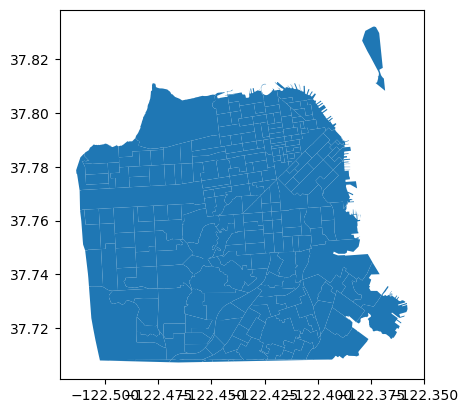

In [185]:
# read the boundary shape file
# Get the Convex Hull of the network
sf_network=pd.concat([motor_network,bike_network],axis=0)
convex_hull_area =sf_network.unary_union.convex_hull
# Show output
census_track2_sf=gpd.clip(census_track1,convex_hull_area)
census_track2_sf.plot()

In [186]:
# save the results by Census Tract
CS_median=census_node_level_connectivity_score (sf_connectivity,census_track2_sf)
CS_median.head()

,GISJOIN,Meadian CS,STATEFP,COUNTYFP,TRACTCE,GEOID,NAME,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,Shape_Leng,Shape_Le_1,Shape_Area,geometry
0,G0600750010101,0.0,06,075,010101,06075010101,101.01,Census Tract 101.01,G5020,S,696934.0,646917.0,+37.8085195,-122.4095545,21764.654020,12265.133958,638229.374346,"MULTIPOLYGON (((-122.40843 37.80894, -122.4084..."
1,G0600750010102,0.0,06,075,010102,06075010102,101.02,Census Tract 101.02,G5020,S,79556.0,0.0,+37.8046900,-122.4139437,1202.159619,1202.159619,79555.896086,"POLYGON ((-122.41285 37.80381, -122.41322 37.8..."
2,G0600750010201,0.0,06,075,010201,06075010201,102.01,Census Tract 102.01,G5020,S,186873.0,0.0,+37.8013029,-122.4212147,1817.457273,1817.457273,186870.296630,"POLYGON ((-122.41806 37.80268, -122.41797 37.8..."
3,G0600750010202,0.0,06,075,010202,06075010202,102.02,Census Tract 102.02,G5020,S,332254.0,295382.0,+37.8106454,-122.4245951,4546.713085,4050.461855,333375.029584,"MULTIPOLYGON (((-122.42587 37.80741, -122.4259..."
4,G0600750010300,0.0,06,075,010300,06075010300,103,Census Tract 103,G5020,S,268261.0,0.0,+37.8016200,-122.4156810,2324.328320,2324.328320,268257.279786,"POLYGON ((-122.41682 37.80489, -122.41605 37.8..."


# Assign the Grade of the Connectivity for Bike Network-micro connectivity

In [187]:
#m=gpd.read_file("H:/mmmiah/Desktop/Bicycle Connectivity Project/Project-Bicycle Connectivity/Nodel Level Connectivity_results/Marin_Census_level_Median_BMN_CS.shp")
CS_median['cs_ranking']=CS_median.apply(lambda row:count_census_block(row['Meadian CS']),axis=1 )
# Now count the census tract for Bay area by cs ranking
CS_median.groupby(['cs_ranking'])['GISJOIN'].count()

cs_ranking
excellently connected      1
fairly connected           1
poorly connected         243
Name: GISJOIN, dtype: int64

# Assign the Grade of the Connectivity for Bike Network-macro connectivity

In [188]:
# Join the nodel level shortest path results with census tract
AC=gpd.sjoin(sf_connectivity,census_track2_sf)
# aggregrate total bike path by census tract
AC1=pd.DataFrame({'total_bike_path':AC.groupby(['GISJOIN'])['total_bike_path'].sum()}).reset_index()
# aggregrate total motor path by census tract
AC2=pd.DataFrame({'total_motor_path':AC.groupby(['GISJOIN'])['total_motor_path'].sum()}).reset_index()
# join total bike and motor path processing data by census tract GISJOIN id
ACS=pd.merge(AC1, AC2, on=['GISJOIN'], how='inner')
# calculate area connectivity by each census tract
ACS['ACS']=ACS['total_bike_path']/ACS['total_motor_path']
# assigm the grade of the census tract
ACS['cs_ranking']=ACS.apply(lambda row:count_census_block(row['ACS']),axis=1 )
# Now count the census tract for Bay area by cs ranking
ACS.groupby(['cs_ranking'])['GISJOIN'].count()

cs_ranking
excellently connected      1
fairly connected           1
poorly connected         243
Name: GISJOIN, dtype: int64

# Calculate the Connectivity score using LSN Algorithm

In [189]:
sf_low_stress_network=motor_network.loc[motor_network['LTS']<3]

In [190]:
sf_low_stress_network.groupby(['LTS'])['length'].sum()*0.000621371

LTS
1    812.662611
2    148.974587
Name: length, dtype: float64

In [191]:
sf_low_stress_network['length'].sum()*0.000621371

961.6371974033337

In [192]:
sf_node_level_LSN_CS= node_level_connectivity_score(motor_network,sf_low_stress_network)
sf_node_level_LSN_CS.head()

C:\Users\mmmiah\AppData\Local\Temp\ipykernel_16896\4200728652.py:3: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  sf_lts_motor_g=gpd.GeoDataFrame.explode(sf_motor_network)
C:\Users\mmmiah\Anaconda3\envs\geo_env\Lib\site-packages\momepy\utils.py:247: UserWarning: Geometry is in a geographic CRS. Results from 'length' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf_network[length] = gdf_network.geometry.length
C:\Users\mmmiah\AppData\Local\Temp\ipykernel_16896\4200728652.py:21: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  sf_lts_bike_g=gpd.GeoDataFrame.explode(sf_bike

,total_motor_path,nodeID_x,geometry,total_bike_path,nodeID_y,CS
0,1.701622e+08,0,POINT (-122.40138 37.78927),1.444927e+08,4664.0,0.849147
1,1.703077e+08,1,POINT (-122.40081 37.78881),1.444650e+08,8126.0,0.848259
2,1.603944e+08,2,POINT (-122.45888 37.76530),1.317572e+08,0.0,0.821457
3,1.592678e+08,3,POINT (-122.45882 37.76437),1.313730e+08,1.0,0.824856
4,1.699604e+08,4,POINT (-122.45986 37.77928),1.360185e+08,2.0,0.800295


In [193]:
# overall Area Connectivity
sf_LSN_Area_CS=sf_node_level_LSN_CS['total_bike_path'].sum()/sf_node_level_LSN_CS['total_motor_path'].sum()
sf_LSN_Area_CS

0.6909137534126384

# Assign the Grade of the Connectivity for low Stress Network-micro connectivity

In [194]:
CS_median1=census_node_level_connectivity_score (sf_node_level_LSN_CS,census_track2_sf)
CS_median1.head()

,GISJOIN,Meadian CS,STATEFP,COUNTYFP,TRACTCE,GEOID,NAME,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,Shape_Leng,Shape_Le_1,Shape_Area,geometry
0,G0600750010101,0.666072,06,075,010101,06075010101,101.01,Census Tract 101.01,G5020,S,696934.0,646917.0,+37.8085195,-122.4095545,21764.654020,12265.133958,638229.374346,"MULTIPOLYGON (((-122.40843 37.80894, -122.4084..."
1,G0600750010102,0.674628,06,075,010102,06075010102,101.02,Census Tract 101.02,G5020,S,79556.0,0.0,+37.8046900,-122.4139437,1202.159619,1202.159619,79555.896086,"POLYGON ((-122.41285 37.80381, -122.41322 37.8..."
2,G0600750010201,0.698723,06,075,010201,06075010201,102.01,Census Tract 102.01,G5020,S,186873.0,0.0,+37.8013029,-122.4212147,1817.457273,1817.457273,186870.296630,"POLYGON ((-122.41806 37.80268, -122.41797 37.8..."
3,G0600750010202,0.677094,06,075,010202,06075010202,102.02,Census Tract 102.02,G5020,S,332254.0,295382.0,+37.8106454,-122.4245951,4546.713085,4050.461855,333375.029584,"MULTIPOLYGON (((-122.42587 37.80741, -122.4259..."
4,G0600750010300,0.689464,06,075,010300,06075010300,103,Census Tract 103,G5020,S,268261.0,0.0,+37.8016200,-122.4156810,2324.328320,2324.328320,268257.279786,"POLYGON ((-122.41682 37.80489, -122.41605 37.8..."


In [195]:
#mrl=gpd.read_file("H:/mmmiah/Desktop/Bicycle Connectivity Project/Project-Bicycle Connectivity/Nodel Level Connectivity_results/Marin_census_level_LMN_CS.shp")
CS_median1 ['cs_ranking']=CS_median1 .apply(lambda row:count_census_block(row['Meadian CS']),axis=1 )
# Now count the census tract for Bay area by cs ranking
CS_median1.groupby(['cs_ranking'])['GISJOIN'].count()

cs_ranking
excellently connected     34
fairly connected          14
poorly connected          22
very well connected       46
well connected           128
Name: GISJOIN, dtype: int64

# Assign the Grade of the Connectivity for low stress Network-macro connectivity

In [196]:
# Grade the connectivity
# Join the nodel level shortest path results with census tract
AC=gpd.sjoin(sf_node_level_LSN_CS,census_track2_sf)
# aggregrate total bike path by census tract
AC1=pd.DataFrame({'total_bike_path':AC.groupby(['GISJOIN'])['total_bike_path'].sum()}).reset_index()
# aggregrate total motor path by census tract
AC2=pd.DataFrame({'total_motor_path':AC.groupby(['GISJOIN'])['total_motor_path'].sum()}).reset_index()
# join total bike and motor path processing data by census tract GISJOIN id
ACS=pd.merge(AC1, AC2, on=['GISJOIN'], how='inner')
# calculate area connectivity by each census tract
ACS['ACS']=ACS['total_bike_path']/ACS['total_motor_path']
# assigm the grade of the census tract
ACS['cs_ranking']=ACS.apply(lambda row:count_census_block(row['ACS']),axis=1 )
# Now count the census tract for Bay area by cs ranking
ACS.groupby(['cs_ranking'])['GISJOIN'].count()

cs_ranking
excellently connected     14
fairly connected          33
poorly connected          18
very well connected       37
well connected           142
Name: GISJOIN, dtype: int64

# End of the Validation